In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(color_codes=True)
# rich output을 바로 보여주도록 설정
%matplotlib inline  

In [6]:
# https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand
df = pd.read_csv("../input/hotel-booking-demand/hotel_bookings.csv")

In [34]:
# 데이터의 샘플 확인
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [32]:
# df[['A']] 와 df['A'] 차이 => DataFrame이냐 Series냐
print(type(df[['hotel']])) # DataFrame
print("==================================")
print(type(df['hotel'])) # Series

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [22]:
df2 = df[['hotel', 'lead_time']]
df2.head()

,hotel,lead_time
0,Resort Hotel,342
1,Resort Hotel,737
2,Resort Hotel,7
3,Resort Hotel,13
4,Resort Hotel,14


In [36]:
# 각 컬럼의 속성 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

*데이터의 개수는 119390개인데, 'children', 'country', 'company' 컬럼의 non-null 값의 개수가 119390개가 아닌 것을 보아 차이만큼의 null값이 있음을 알 수 있다*

In [38]:
# 각 컬럼의 통계치 확인
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


평균, 표준편차, 최대, 최솟값 등을 확인할 수 있다. 다만, 'arrival_data_year'과 같이 숫자형이지만 문자형과 다름 없는 컬럼은 통계치가 의미가 없음을 주의해야한다.

In [41]:
# 각 컬럼의 왜도 확인
df.select_dtypes(include='number').skew()

is_canceled                        0.536678
lead_time                          1.346550
arrival_date_year                 -0.232583
arrival_date_week_number          -0.010014
arrival_date_day_of_month         -0.002000
stays_in_weekend_nights            1.380046
stays_in_week_nights               2.862249
adults                            18.317805
children                           4.112590
babies                            24.646545
is_repeated_guest                  5.326315
previous_cancellations            24.458049
previous_bookings_not_canceled    23.539800
booking_changes                    6.000270
agent                              1.089386
company                            0.601600
days_in_waiting_list              11.944353
adr                               10.530214
required_car_parking_spaces        4.163233
total_of_special_requests          1.349189
dtype: float64

In [42]:
# 각 컬럼의 첨도 확인
df.select_dtypes(include='number').kurtosis()

is_canceled                         -1.712005
lead_time                            1.696449
arrival_date_year                   -0.994564
arrival_date_week_number            -0.986077
arrival_date_day_of_month           -1.187168
stays_in_weekend_nights              7.174066
stays_in_week_nights                24.284555
adults                            1352.115116
children                            18.673692
babies                            1633.948235
is_repeated_guest                   26.370077
previous_cancellations             674.073693
previous_bookings_not_canceled     767.245210
booking_changes                     79.393605
agent                               -0.007180
company                             -0.490795
days_in_waiting_list               186.793070
adr                               1013.189851
required_car_parking_spaces         29.998056
total_of_special_requests            1.492565
dtype: float64

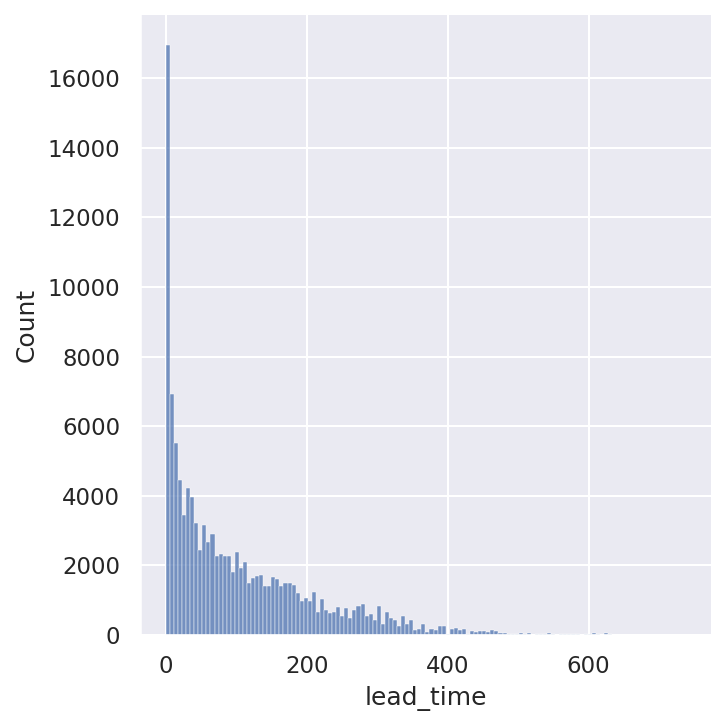

In [51]:
# 특정 변수 분포 시각화
## `distplot` is a deprecated function -> use 'displot' or 'histplot'
plt.rcParams['figure.dpi'] = 150
sns.displot(df['lead_time'])

<Axes: xlabel='hotel', ylabel='lead_time'>

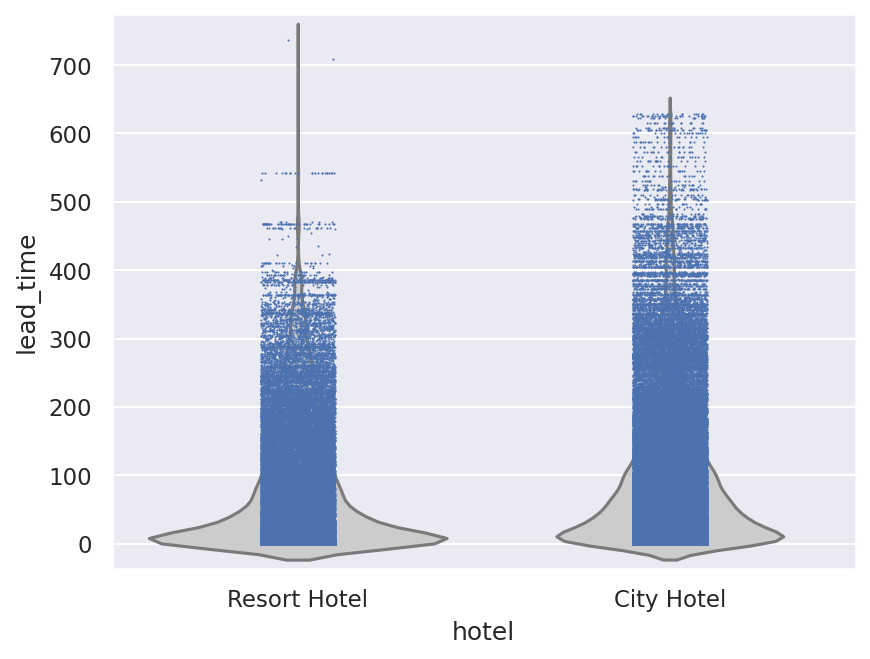

In [52]:
# Violineplot()과 stripplot()
sns.violinplot(x='hotel', y='lead_time', data = df, inner = None, color=".8")
sns.stripplot(x="hotel", y="lead_time", data=df, size=1)